# Importing Library

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [63]:
df=pd.read_csv('/content/creditcard.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [64]:
df.shape

(150002, 18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


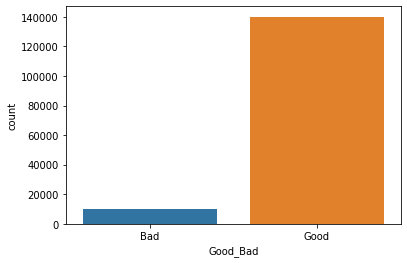

In [65]:
sns.countplot(df['Good_Bad'])

In [66]:
df['NumberOfDependents'].value_counts()

0.0     75950
1.0     23027
2.0     17082
0       10952
3.0      8255
1        3289
4.0      2497
2        2440
3        1228
5.0       636
4         365
6.0       133
5         110
7.0        45
6          25
8.0        20
7           6
10.0        5
8           4
9.0         3
9           2
13.0        1
Good        1
Bad         1
20.0        1
Name: NumberOfDependents, dtype: int64

In [67]:
# Finding the row where string present in feature

print(np.where(df['NumberOfDependents']=='Good'))
print(np.where(df['NumberOfDependents']=='Bad'))

(array([150000]),)
(array([150001]),)


In [68]:
# Dropping the object row

df.drop(index=[150000,150001],inplace=True)

In [69]:
# Changing the datatype

df['NumberOfDependents']=df['NumberOfDependents'].astype('float')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [71]:
# Monthly income feature repeated 2 times. So, dropping it

df.drop('MonthlyIncome.1',axis=1,inplace=True)

In [72]:
# Finding Null values

df.isnull().sum()

NPA Status                                  0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
Gender                                      0
Region                                      0
MonthlyIncome                           29731
Rented_OwnHouse                             0
Occupation                                  0
Education                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
Good_Bad                                    0
dtype: int64

In [73]:
# Here we are going to cover inbalance data so droping nan

df.dropna(axis=0,inplace=True)

In [74]:
df_cat=df.select_dtypes(include='object')

In [75]:
# Encoding on categorical feature

encoder=LabelEncoder()

def label_encode(df):
    for i in df_cat.columns:
        df[i]=encoder.fit_transform(df[i])

label_encode(df)

In [76]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,1,3,9120.0,0,4,1,2.0,0.802982,13.0,0.0,6.0,0.0,2.0,0
1,0.0,0.957151,40.0,0,3,2600.0,0,4,0,0.0,0.121876,4.0,0.0,0.0,0.0,1.0,1
2,0.0,0.658180,38.0,0,3,3042.0,0,4,2,1.0,0.085113,2.0,1.0,0.0,0.0,0.0,1
3,0.0,0.233810,30.0,0,3,3300.0,0,4,4,0.0,0.036050,5.0,0.0,0.0,0.0,0.0,1
4,0.0,0.907239,49.0,1,3,63588.0,0,4,3,1.0,0.024926,7.0,0.0,1.0,0.0,0.0,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            120269 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 2   age                                   120269 non-null  float64
 3   Gender                                120269 non-null  int64  
 4   Region                                120269 non-null  int64  
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       120269 non-null  int64  
 7   Occupation                            120269 non-null  int64  
 8   Education                             120269 non-null  int64  
 9   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  float64
 10  DebtRatio                             120269 non-null  float64
 11  

In [78]:
df['Good_Bad'].value_counts()

1    111912
0      8357
Name: Good_Bad, dtype: int64

# Under sampling

In [79]:
x=df.drop('Good_Bad',axis=1)
y=df['Good_Bad']

In [80]:
print(x.shape,y.shape)

(120269, 16) (120269,)


In [81]:
from imblearn.under_sampling import NearMiss

In [82]:
u_s=NearMiss(random_state=42)

In [83]:
x_u,y_u=u_s.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [84]:
print(x_u.shape,y_u.shape)

(16714, 16) (16714,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


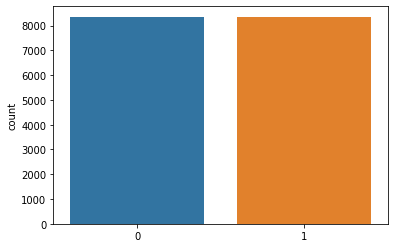

In [85]:
sns.countplot(y_u)

# Over sampling ---->SMOTETomek method(hybrid method) or random over sampler method

# SMOTETomek

In [86]:
from imblearn.combine import SMOTETomek

In [87]:
sm=SMOTETomek(ratio=1)

In [88]:
x_sm,y_sm=sm.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [89]:
print(x_sm.shape,y_sm.shape)

(222170, 16) (222170,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


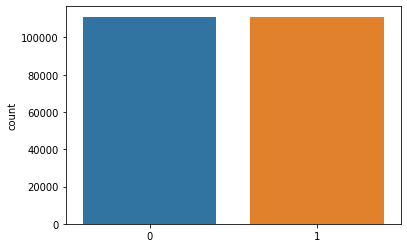

In [90]:
sns.countplot(y_sm)

# RandomOverSampler

In [91]:
from imblearn.over_sampling import RandomOverSampler

In [92]:
ro=RandomOverSampler(ratio=1)

In [93]:
x_ro,y_ro=ro.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [94]:
print(x_ro.shape,y_ro.shape)

(223824, 16) (223824,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


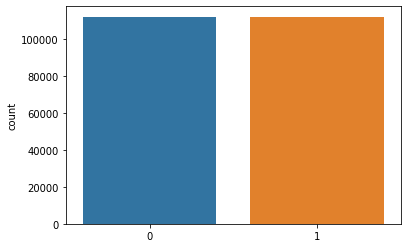

In [95]:
sns.countplot(y_ro)